You can solve these exercises in the room or at home. For this week, and the next 3 weeks, exercises have to be solved by creating a single dedicated `.py` file called `03ex_representation.py`.

You can divide the individual exercises in the source code with appropriate comments (`#`).

The exercises need to run without errors with `python3 03ex_representation.py`.

1\. **Number representation**

Write a function that converts integer numbers among the bin, dec, and hex representations (bin<->dec<->hex).
Determine the input type in the function, and pass another argument to choose the output representation.

In [24]:
def converter(num : int, output : str):
    if type(num) == int : 
        if output == 'bin':
            return bin(num)
        elif output == 'hex' :
            return hex(num)
        elif output == 'dec' : 
            return num
        else :
            print("representation not recognized")
    else :
        print("Num in not an int")

converter(50, "dec")

50

2\. **32-bit floating point number**

Write a function that converts a 32 bit binary string (for example, `110000101011000000000000`) into a single precision floating point in decimal representation. Interpret the various bits as sign, fractional part of the mantissa and exponent, according to the IEEE 754 reccommendations.

In [57]:
def bin_to_decimal(stringa : str):
    s = int(stringa[0])
    sign = (-1)**s
    e = stringa[1:9]
    exp = int(e, 2)
    f = stringa[9:]
    mantissa = 1
    for i in range(len(f)) :
        mantissa += int(f[i])/(2**(i+1))
    x = sign*mantissa*(2**(exp-127)) # bias = 127 for single precision 
    return x

bin_to_decimal("110000101011000000000000")

-88.0

3\. **Underflow and overflow**

Write a program to determine the approximate underflow and overflow limits (within a factor of 2) for floating point numbers on your computer. 

*Hint*: define two variables initialized to 1, and halve/double them for a sufficient amount of times to exceed the under/over-flow limits.

In [18]:
a, b = 1, 1 
N = 2000

for n in range(N):
    try :
        a = a*2
        print(n, "%.e" % a)
    except OverflowError :
        print("Reached overflow ") #print(f"Reached overflow -> {a}")
        break

for n in range(N):
    b = b/2
    print(n, b)
    if b == 0.0 :
        print("Reached underflow") 
        break
    
    
        

0 2e+00
1 4e+00
2 8e+00
3 2e+01
4 3e+01
5 6e+01
6 1e+02
7 3e+02
8 5e+02
9 1e+03
10 2e+03
11 4e+03
12 8e+03
13 2e+04
14 3e+04
15 7e+04
16 1e+05
17 3e+05
18 5e+05
19 1e+06
20 2e+06
21 4e+06
22 8e+06
23 2e+07
24 3e+07
25 7e+07
26 1e+08
27 3e+08
28 5e+08
29 1e+09
30 2e+09
31 4e+09
32 9e+09
33 2e+10
34 3e+10
35 7e+10
36 1e+11
37 3e+11
38 5e+11
39 1e+12
40 2e+12
41 4e+12
42 9e+12
43 2e+13
44 4e+13
45 7e+13
46 1e+14
47 3e+14
48 6e+14
49 1e+15
50 2e+15
51 5e+15
52 9e+15
53 2e+16
54 4e+16
55 7e+16
56 1e+17
57 3e+17
58 6e+17
59 1e+18
60 2e+18
61 5e+18
62 9e+18
63 2e+19
64 4e+19
65 7e+19
66 1e+20
67 3e+20
68 6e+20
69 1e+21
70 2e+21
71 5e+21
72 9e+21
73 2e+22
74 4e+22
75 8e+22
76 2e+23
77 3e+23
78 6e+23
79 1e+24
80 2e+24
81 5e+24
82 1e+25
83 2e+25
84 4e+25
85 8e+25
86 2e+26
87 3e+26
88 6e+26
89 1e+27
90 2e+27
91 5e+27
92 1e+28
93 2e+28
94 4e+28
95 8e+28
96 2e+29
97 3e+29
98 6e+29
99 1e+30
100 3e+30
101 5e+30
102 1e+31
103 2e+31
104 4e+31
105 8e+31
106 2e+32
107 3e+32
108 6e+32
109 1e+33
110 3e+33


4\. **Machine precision**

Similarly to the previous exercise, write a program to determine the machine precision for floating point numbers.

*Hint*: define a new variable by adding an increasingly smaller value and check when the addition starts to have no effect on the number.

In [26]:
c = 1 

for n in range(30) :
    c = 1+  10**(-n)
    print(n,"|",c) # 15st loop 

0 | 2
1 | 1.1
2 | 1.01
3 | 1.001
4 | 1.0001
5 | 1.00001
6 | 1.000001
7 | 1.0000001
8 | 1.00000001
9 | 1.000000001
10 | 1.0000000001
11 | 1.00000000001
12 | 1.000000000001
13 | 1.0000000000001
14 | 1.00000000000001
15 | 1.000000000000001
16 | 1.0
17 | 1.0
18 | 1.0
19 | 1.0
20 | 1.0
21 | 1.0
22 | 1.0
23 | 1.0
24 | 1.0
25 | 1.0
26 | 1.0
27 | 1.0
28 | 1.0
29 | 1.0


5\. **Quadratic solution**

Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the function to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying the numerator and the denominator by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what has been previously obtained, and why? (add the answer to a Python comment)

(c) write a function that computes the roots of a quadratic equation accurately in all cases

In [11]:
from math import sqrt

# a and b)
def quadratic_eq(a,b,c):
    x1 = (-b + sqrt(b**2 - 4*a*c))/(2*a)
    x2 = (-b - sqrt(b**2 - 4*a*c))/(2*a)

    x3 = 2*c/(-b - sqrt(b**2 - 4*a*c))
    x4 = 2*c/(-b + sqrt(b**2 - 4*a*c)) #subtracting a really small number from a really big number can result in errors(?)  
    
    zero3 = a*x3**2 + b*x3+c
    zero4 = a*x4**2 + b*x4+c
    
    print("x3,4 =", x3,"or", x4, "\n", zero3, zero4)
    
    zero1 = (a*x1**2 + b*x1+c)
    zero2 = a*x2**2 + b*x2+c

    print("x1,2 =", x1,"or", x2, "\n", zero1, zero2)
    
#testing 
a = 0.001
b = 1000
c = 0.001


quadratic_eq(a,b,c)

      

999.999999998
x3,4 = -1.000000000001e-06 or -1000010.5755125057 
 0.0 10575.62534720993
x1,2 = -9.999894245993346e-07 or -999999.999999 
 1.0575401665491313e-08 7.247924804689582e-08


In [12]:
from math import sqrt

# c)
def quadratic_eq(a,b,c):
    x2 = (-b - sqrt(b**2 - 4*a*c))/(2*a) # to avoid cancellation error I chose to compute the solution with minus sign
    x1 = c / (a*x2) # this computes the other solution directly from the first one, therefore avoiding subtracting two close numbers
    
    zero2 = a*x2**2 + b*x2+c #check if x2 is a solution
    zero1 = (a*x1**2 + b*x1+c)
    
    #print("x2 precise =", x2,"\n x1 precise", x1, "\n zero1 =", zero1, "\n zero2=",zero2)
    print("x2=",x2)
   
#testing
a = 0.001
b = 1000
c = 0.001

quadratic_eq(a,b,c)
print(b**2-4*a*c)
print(sqrt(b**2-4*a*c), "is sqrt")
print((sqrt(b**2-4*a*c))**2)
print(-b-sqrt(b**2-4*a*c))
print(sqrt(b**2-4*a*c)-b)


x2= -999999.999999
999999.999996
999.999999998 is sqrt
999999.9999960001
-1999.999999998
-1.999978849198669e-09


In [5]:
#prova 
from math import sqrt

# c)
def quadratic_eq(a,b,c):
    x2 = (-b - b*sqrt(1 - (4*a*c)/b**2))/(2*a) 
    x1 = c / (a*x2) 
    
    zero2 = a*x2**2 + b*x2+c #check if x2 is a solution
    zero1 = (a*x1**2 + b*x1+c)
    
    #print("x2 precise =", x2,"\n x1 precise", x1, "\n zero1 =", zero1, "\n zero2=",zero2)
    print("x2=",x2)
   
#testing
a = 0.001
b = 1000
c = 0.001

quadratic_eq(a,b,c)
print(b**2-4*a*c, "is correct") 
print(sqrt(b**2-4*a*c), "is square root")
print(sqrt(1-(4*a*c)/b**2))
print(-b+sqrt(b**2-4*a*c))
print(sqrt(b**2-4*a*c)-b)

x2= -999999.999999
999999.999996 is correct
999.999999998
9.99999999998
-1.999978849198669e-09
-1.999978849198669e-09


6\. **The derivative**

Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare it with the answer your program gives. The two will not agree perfectly. Why?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scale with $\delta$?

1 is different from 1.010000000000001
0.0001 -> 1.0000999999998899
1e-06 -> 1.0000009999177333
1e-08 -> 1.0000000039225287
1e-10 -> 1.000000082840371
1e-12 -> 1.0000889005833413
1e-14 -> 0.9992007221626509
-9.99900008897769e-05
-9.999167334453136e-07
-3.922528730872304e-09
-8.284036414483791e-08
-8.889268073015088e-05
0.0007999171934335475


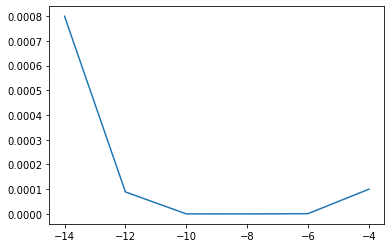

In [59]:
def f(x):
    return x*(x-1)
    
x = 1
delta1= 10**-2

# a)
def derivative(x, delta): 
    return (f(x+delta)-f(x))/delta

def analytical_derivative(x):
    return 2*x-1

print(analytical_derivative(1), "is different from", derivative(1, 10**-2)) # Catastrophic cancellation occurs when subtracting two numbers that are very close to one another

# b)
delta = [10**-4, 10**-6, 10**-8, 10**-10, 10**(-12), 10**(-14)]
for i in range(len(delta)):
    print(delta[i],"->", derivative(1, delta[i])) # The accuracy is better for delta = 10^-8 and worsen for lower values (because one gets close to overflow ) and for higher values (because of subtraction of very close numbers) 

def accuracy(x):
    for i in range(len(delta)):
        print((analytical_derivative(x)-derivative(x, delta[i]))/derivative(x, delta[i]))

accuracy(1)

import matplotlib.pyplot as plt
import numpy as np

x = [np.log10(d) for d in delta]
y = [abs(analytical_derivative(1) - derivative(1,delta[i])) for i in range(len(delta))]

plt.plot(x, y)

7\. **Integral of a semicircle**

Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which is known to be $I=\frac{\pi}{2}=1.57079632679...$.

Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a program to compute the integral with $N=100$. How does the result compare to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? Use `timeit` to measure the time.

In [70]:
N = 100
a = -1
b = 1

from math import sqrt, pi

def f(x):
    return sqrt(1-x**2)
    
def R_integral(N):
    sum = 0
    for k in range(1,N+1):
        y = a + k * 2/N 
        sum += 2/N * f(y) 
    return sum

# a) 
print(R_integral(100), "is different from" , pi/2, "difference =" , abs(pi/2-R_integral(100)))

# b)


1.5691342555492505 is different from 1.5707963267948966 difference = 0.0016620712456461018


In [14]:
import time

N = 10000000
a = -1
b = 1

from math import sqrt, pi

def f(x):
    return sqrt(1-x**2)
    
def R_integral(N):
    start = time.time()
    sum = 0
    for k in range(1,N+1):
        y = a + k * 2/N 
        sum += 2/N * f(y) 
    end = time.time()
    if (end-start) > 1 :
        print(N, sum)
        return True
    return False

for i in range(0, N, 100000):
    if R_integral(i) : break 

print()

2100000 1.5707963262483344
